In [2]:
from tensorflow.keras.datasets import imdb

In [21]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [15]:
train_labels[0]

1

In [32]:
max([max(sequence) for sequence in train_data])

9999

In [37]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# print(reverse_word_index)

In [38]:
len(reverse_word_index)

88584

In [40]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #10k cols
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [43]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [46]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='rmsprop' , loss = "binary_crossentropy", metrics=['accuracy'])

In [49]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 467us/step - loss: 0.0119 - acc: 0.9969 - val_loss: 0.7067 - val_acc: 0.8632
Epoch 2/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.0030 - acc: 0.9998 - val_loss: 0.7345 - val_acc: 0.8619
Epoch 3/20
15000/15000 [==============================] - 5s 325us/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.7680 - val_acc: 0.8629
Epoch 4/20
15000/15000 [==============================] - 5s 315us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.8041 - val_acc: 0.8580
Epoch 5/20
15000/15000 [==============================] - 5s 357us/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.8546 - val_acc: 0.8548
Epoch 6/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.9206 - val_acc: 0.8520
Epoch 7/20
15000/15000 [==============================] - 5s 316us/step - loss: 0.0017 - acc: 0.9998 - val_loss: 0.8821 - 

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

ValueError: x and y must have same first dimension, but have shapes (1,) and (20,)

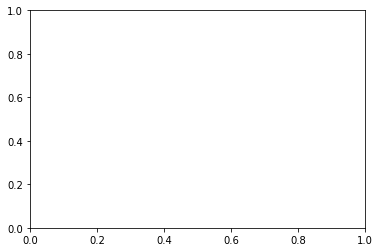

In [61]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

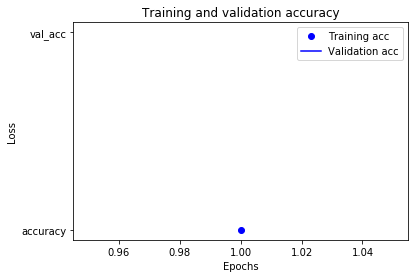

In [70]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, ["accuracy"], 'bo', label='Training acc')
plt.plot(epochs, ["val_acc"], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 24s 954us/step - loss: 0.4614 - acc: 0.8198
Epoch 2/4
25000/25000 [==============================] - 9s 371us/step - loss: 0.2645 - acc: 0.9065
Epoch 3/4
25000/25000 [==============================] - 9s 342us/step - loss: 0.2040 - acc: 0.9276
Epoch 4/4
25000/25000 [==============================] - 48s 2ms/step


In [72]:
model.predict(x_test)


array([[0.2426354 ],
       [0.9996636 ],
       [0.9233819 ],
       ...,
       [0.12763548],
       [0.06513578],
       [0.6993808 ]], dtype=float32)